In [38]:

from solution import Solution
from basis import Basis
import itertools
import numpy as np


# SET ACCURATE PHI


eps = 0.1
power = 5

params = {
    'n_dims': 2,
    'dim_sizes': np.array([3, 4]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    # 'n_funcs': 2,
}
phi = Solution(**params)
# phi.solve(verbose = True, **iteration_phi_dict)


# params = {
#     'n_dims': 2,
#     'dim_sizes': np.array([1, 10]),
#     'area_lims': np.array([[0,0.1], [0,1]]),
#     'power': power,
#     'basis': Basis(power),
# }
rho = Solution(**params)
w = (rho.steps[0]/2)


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))



connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            ])

def H(phi, rho, x):
    return -(phi.eval(x,[0,1])**2)/2 * rho.eval(x, [0,0])


colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (-u_bas([1,0])-eps*u_bas([0,2])+H(phi, rho, x))/eps * w**2 ]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 1
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def terminal_state(rho, x):
    point = x
    t,x = x
    if t >= 0.0999:
        # if x<1/4:
        #     p = 1-4*x
        # if x<1/2 and x>=1/4:
        #     p = 6*x - 3/2
        # if x<3/4 and x>=1/2:
        #     p = -6*x + 9/2
        # if x>=3/4: 
        #     p = 4*x - 3
        # print(x,t)
        p = 6*x*(1-x)
        return rho.eval(point, [0,0], cells_closed_right=True) - p
    else:
        if x <0.001:
            return 0
        else: 
            return 0

        
# border_right_operators = [lambda u, _, x, x_loc: terminal_state(rho,x),#x[1]*(1-x[1]) #+ int(x[0]==0) * initial_state(x) * border_weight,
#                             # lambda u, _, x, x_loc: 0 * w
#                             ]
# border_phi_ops = [border_left_operators, border_right_operators]

phi_points = (colloc_points, connect_points, border_points)
                            
# # connect_ops = [connect_left_operators, connect_right_operators]

# iteration_phi_dict = {'points':phi_points,
#         'colloc_ops':colloc_ops,
#         'border_ops':border_phi_ops,
# #        'connect_ops':connect_ops
# }


In [32]:
# power = 5

def dir(point: np.array) -> np.array:
            direction = (np.abs(point) == 1) * (np.sign(point)) 
            return np.array(direction, dtype=int)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

border_points = np.array([[-1, 0.5], #[1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], #[1, -0.5],
                            [-0.5, -1], [-0.5, 1],])



# def phi(point):
#     t,x = point
#     return x**2

# def phi_x(point):
#     t,x = point
#     return 2*x

def H_q_x(phi ,rho, x):
    return -(phi.eval(x,[0,1])*rho.eval(x, [0,1]) + phi.eval(x,[0,2])*rho.eval(x,[0,0]))/2
    
# def H_q_x(phi ,rho, x):
#     return 2*(phi.eval(x,[0,2])*rho.eval(x, [0,1])+phi.eval(x,[0,1])*rho.eval(x, [0,2])) + \
#         phi.eval(x,[0,3])*rho.eval(x,[0,0]) + phi.eval(x,[0,2])*rho.eval(x,[0,0])

# def H_q_x(phi, rho):
#     return 1


# colloc_left_rho_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) - H_q(phi(x))*u_bas([0,1]) - H_q_x(phi(x)) * phi_x(x)*u_bas([0,0])) * w*2]
# colloc_rho_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
# colloc_rho_ops = [colloc_left_rho_operators, colloc_rho_right_operators]

border_left_rho_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def initial_state(point):
    t, x = point
    if t == 0:
        return 1
    else:
        return 10*(0.1 - t)


border_right_rho_operators = [lambda u, _, x, x_loc: initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_rho_ops = [border_left_rho_operators, border_right_rho_operators]

rho_points = (colloc_points, connect_points, border_points)

connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)) + np.sum(dir(x_loc)) * u_bas(dir(x_loc)) * w,
                        lambda _, u_bas, x, x_loc: u_bas(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_bas(3*dir(x_loc))* w**3
                        ]
connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)) + np.sum(dir(x_loc))*u_nei(dir(x_loc))* w,
                            lambda _, u_nei, x, x_loc: u_nei(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_nei(3*dir(x_loc))* w**3
                            ]

# connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)),
                        # lambda _, u_bas, x, x_loc: u_bas(dir(x_loc))* w
                        
# connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)),
                            # lambda _, u_nei, x, x_loc: u_nei(dir(x_loc))* w
                            # ]
                            
connect_rho_ops = [connect_left_operators, connect_right_operators]

def iterate_rho(rho, phi, threshold=1e-8):
    
    colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) + u_bas([0,0])*H_q_x(phi,rho,x) + u_bas([0,1])*H(phi,rho,x)) * w*2]
    colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
    colloc_rho_ops = [colloc_left_operators, colloc_right_operators]

    iteration_rho_dict = {'points':rho_points,
            'colloc_ops':colloc_rho_ops,
            'border_ops':border_rho_ops,
            # 'connect_ops':connect_rho_ops
            }

    rho.solve(verbose = True, **iteration_rho_dict, threshold=threshold)
    
    


    
    
    border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]
    border_right_operators = [lambda u, _, x, x_loc: terminal_state(rho,x) * border_weight,#x[1]*(1-x[1]) #+ int(x[0]==0) * initial_state(x) * border_weight,
                                # lambda u, _, x, x_loc: 0 * w
                                ]
    border_phi_ops = [border_left_operators, border_right_operators]

    colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (-u_bas([1,0])-eps*u_bas([0,2])-H(phi, rho, x)) * w**2/eps]
    colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
    colloc_phi_ops = [colloc_left_operators, colloc_right_operators]

    iteration_phi_dict = {'points':phi_points,
            'colloc_ops':colloc_phi_ops,
            'border_ops':border_phi_ops,
            # 'connect_ops':connect_rho_ops
            }
    
    
    phi.solve(verbose = True, **iteration_phi_dict, threshold=threshold)
    


In [33]:
phi.cells_coefs *= 0

NameError: name 'phi' is not defined

In [34]:
# phi.solve(verbose = True, **iteration_phi_dict)
iterate_rho(rho=rho, phi=phi)

NameError: name 'rho' is not defined

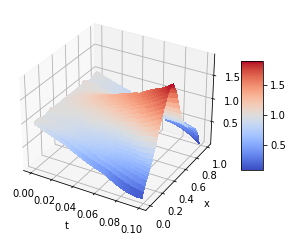

In [45]:
rho.plot2d()

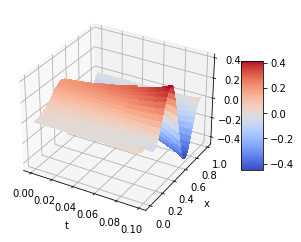

In [46]:
phi.plot2d()

In [8]:
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]
border_right_operators = [lambda u, _, x, x_loc: terminal_state(rho,x),#x[1]*(1-x[1]) #+ int(x[0]==0) * initial_state(x) * border_weight,
                        # lambda u, _, x, x_loc: 0 * w
                        ]
border_phi_ops = [border_left_operators, border_right_operators]

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: -u_bas([1,0])-eps*u_bas([0,2])+H(phi, rho, x)]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_phi_ops = [colloc_left_operators, colloc_right_operators]

iteration_phi_dict = {'points':phi_points,
        'colloc_ops':colloc_phi_ops,
        'border_ops':border_phi_ops,
        # 'connect_ops':connect_rho_ops
        }
# rho.solve(verbose = True, **iteration_rho_dict, threshold=threshold)
phi.solve(verbose = True, **iteration_phi_dict, threshold=1e-8)

0.3225732593457067
0.3171082073068323
0.14955466421677827
0.059632509251351995
0.030067571218063863
0.015174819003336195
0.017075370497975403
0.009710227358851384
0.005971017162884586
0.0020257933946515646
0.0017508595606817688
0.000520014180245533
0.0004289393155964688
0.0002719193308104578
0.00013914372923189838
0.00012595985716895575
9.713828277692349e-05
4.8221822312177753e-05
5.3986744170536616e-05
1.7086934982313284e-05
2.2564412739484174e-05
1.0343848640820275e-05
8.598319902512752e-06
5.654384043582428e-06
3.8658797715945825e-06
2.6004376210558844e-06
1.930240978387232e-06
1.151778946023585e-06
9.379052087477024e-07
5.443566713919656e-07
4.292405802325261e-07
2.6882815719331266e-07
1.944168162570925e-07
1.302924213103518e-07
9.065467830582374e-08
6.120231611783655e-08
4.3144884318002674e-08
2.8556063152995748e-08
2.042455707340629e-08
1.3481114211066902e-08
9.55892456855345e-09
Iterations to converge:  40


In [49]:
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) + u_bas([0,0])*H_q_x(first_phi,rho,x) + u_bas([0,1])*H(first_phi,rho,x)) * w*2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_rho_ops = [colloc_left_operators, colloc_right_operators]

iteration_rho_dict = {'points':rho_points,
        'colloc_ops':colloc_rho_ops,
        'border_ops':border_rho_ops,
        # 'connect_ops':connect_rho_ops
        }
power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 20]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
rho = Solution(**params)
rho.cells_coefs *=0
rho.solve(verbose = True, **iteration_rho_dict, threshold=1e-10)

0.809409606638624
1.1314917950014114
0.6910073049809639
1.0907952098633216
2.7361418513745193
3.0598484568938566
6.150591544893301
44.27514203910832
73.88298322747218
50.00348214426836
25.839367508444866
27.960419693435213
16.26093462871537
15.295174767179596
16.521661187215805
17.301947773153987
39.77826013317121
32.00241113291084
23.913445965112476
21.544561328246587


KeyboardInterrupt: 

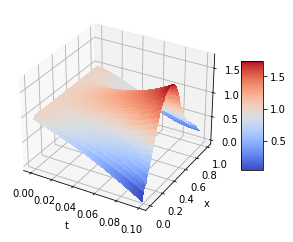

In [9]:
rho.plot2d()

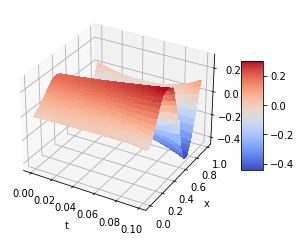

In [10]:
phi.plot2d()

In [47]:
import copy
first_phi = copy.deepcopy(phi)
first_rho = copy.deepcopy(rho)

In [24]:
a = phi

n = 40
func = np.zeros((n,n))
x_lims = a.area_lims[0]
y_lims = a.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[i, j] = a.eval([ax1[i], ax2[j]], [0,0])


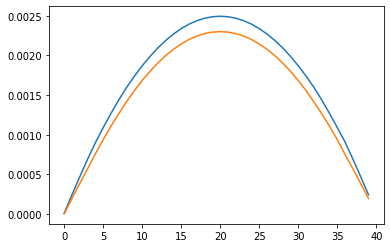

In [25]:
import matplotlib.pyplot as plt
plt.plot(func[-1])
plt.plot(func[0])

In [ ]:

from solution import Solution
from basis import Basis
import itertools
import numpy as np


# SET ACCURATE PHI


eps = 0.1
power = 5

params = {
    'n_dims': 2,
    'dim_sizes': np.array([3, 4]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    # 'n_funcs': 2,
}
phi = Solution(**params)
# phi.solve(verbose = True, **iteration_phi_dict)


# params = {
#     'n_dims': 2,
#     'dim_sizes': np.array([1, 10]),
#     'area_lims': np.array([[0,0.1], [0,1]]),
#     'power': power,
#     'basis': Basis(power),
# }
rho = Solution(**params)
w = (rho.steps[0]/2)


def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))



connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            ])

def H(phi, rho, x):
    return -(phi.eval(x,[0,1])**2)/2 * rho.eval(x, [0,0])


colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (-u_bas([1,0])-eps*u_bas([0,2])+H(phi, rho, x))/eps * w**2 ]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 1
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def terminal_state(rho, x):
    point = x
    t,x = x
    if t >= 0.0999:
        # if x<1/4:
        #     p = 1-4*x
        # if x<1/2 and x>=1/4:
        #     p = 6*x - 3/2
        # if x<3/4 and x>=1/2:
        #     p = -6*x + 9/2
        # if x>=3/4: 
        #     p = 4*x - 3
        # print(x,t)
        p = 6*x*(1-x)
        return rho.eval(point, [0,0], cells_closed_right=True) - p
    else:
        if x <0.001:
            return 0
        else: 
            return 0

        
# border_right_operators = [lambda u, _, x, x_loc: terminal_state(rho,x),#x[1]*(1-x[1]) #+ int(x[0]==0) * initial_state(x) * border_weight,
#                             # lambda u, _, x, x_loc: 0 * w
#                             ]
# border_phi_ops = [border_left_operators, border_right_operators]

phi_points = (colloc_points, connect_points, border_points)
                            
# # connect_ops = [connect_left_operators, connect_right_operators]

# iteration_phi_dict = {'points':phi_points,
#         'colloc_ops':colloc_ops,
#         'border_ops':border_phi_ops,
# #        'connect_ops':connect_ops
# }


In [28]:
from solution import Solution
from basis import Basis
import itertools
import numpy as np

# SET ACCURATE PHI

a = 1
b = 1

eps = 0.2

power = 4
params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 5]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)
w = 1 #(sol.steps[0]/2)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

border_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)
                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2)/4

                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2+
                                                                                            # 2*u_bas([0,0],0)*u_bas([0,1],1)*u_loc([0,1],1))/4/3
                                                                                            ) * w**2 ,
                         lambda u_loc, u_bas, x, x_loc:  ( u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            
                                                                                            # +(2*u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2

                                                                                        #         +(2*(u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_loc([0,1],0)*u_bas([0,0],0))+

                                                                                        #     +u_bas([0,2],1)*u_loc([0,1],0)**2+
                                                                                        #   +2*u_loc([0,2],1)*u_bas([0,1],0)*u_loc([0,1],0))/2/3 
                                                                                          ) * w**2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0,
                          lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]

def terminal_state(rho,x):
    point = x
    t, x = x
    if t >= 0.0999:
        p = 6*x*(1-x)
        return rho.eval(point, [0, 0], func=0, cells_closed_right=True) - p
    else:
        return 0

def p(x):
    return 6*x*(1-x)

def initial_state(point):
    t, x = point
    # if t == 0:
    #     return 1
    # else:
    return 10*(0.1 - t)

def reversed_intitial(point):
    t, x = point
    # if t == 1:
    #     return 1
    # else:
    return t#*0.1

border_weight = 1
small = 1e-5
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*u_bas([0,0],1) * border_weight,
                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*reversed_intitial(x), #+ int(x[0]>sol.area_lims[0,1]-small) * 1,#(u([0,0])-p(x[0])) * border_weight,
                          lambda u, _, x, x_loc: 0*int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0.5], [-1, -0.5],
                            ])
points=[colloc_points, connect_points ,border_points]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

sol.cells_coefs *= 0.00




In [29]:
sol.solve(verbose = True, **iteration_dict, threshold=1e-10)

0.07271957899039283
0.03521262832712783
0.012446901649149647
0.003982999289318449
0.0008799070620935465
0.00015975747486131342
5.4412376017813884e-05
1.8093362396441257e-05
2.5112752586892856e-06
6.312344310375854e-07
2.2917632314101155e-07
4.970579084613569e-08
7.03239499619257e-09
2.1359971066198247e-09
6.815013761651834e-10
7.558279002672919e-11
Iterations to converge:  15


In [24]:
sol.iterate_cells(**iteration_dict)

border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*u_bas([0,0],1) * border_weight,
                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*terminal_state(sol,x) * border_weight,
                          lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]
iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

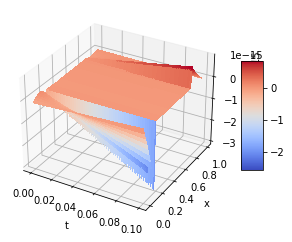

In [30]:
sol.plot2d(func_num=0)

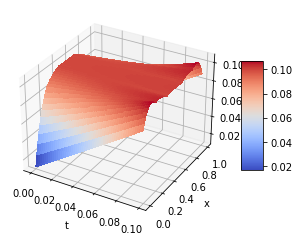

In [31]:
sol.plot2d(func_num=1)

In [27]:
point = [0.034, 0.95]
print(sol.eval(point, [0,0], func=1), sol.eval(point, [0,0], func=0))

0.2998527999999989 0.2998527999999989


In [23]:
sol.cells_coefs

array([[[[[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4]],

         [[0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 0.4],
          [0.4, 0.4, 0.4, 